## Learning Outcomes
- Exploratory data analysis & preparing the data for model building.
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective:
- The Classification goal is to predict “heart disease” in a person with regards to different factors given.

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking.
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents.

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


### 2. Load the dataset and display a sample of five rows of the data frame.

In [10]:
# Load the dataset
path = '/content/heart_2020_cleaned.csv'  # Update with your file location
data = pd.read_csv(path)

# Display the first 5 rows
print(data.head())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [12]:
print("Shape of the dataset:", data.shape)
print(data.info())

Shape of the dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null

### 4. Check the statistical summary of the dataset and write your inferences.

In [13]:
print(data.describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [14]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a summary dataframe
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Drop rows with missing values
data_cleaned = data.dropna()

# Display missing values summary
print(missing_summary)


                  Missing Values  Percentage
HeartDisease                   0         0.0
BMI                            0         0.0
Smoking                        0         0.0
AlcoholDrinking                0         0.0
Stroke                         0         0.0
PhysicalHealth                 0         0.0
MentalHealth                   0         0.0
DiffWalking                    0         0.0
Sex                            0         0.0
AgeCategory                    0         0.0
Race                           0         0.0
Diabetic                       0         0.0
PhysicalActivity               0         0.0
GenHealth                      0         0.0
SleepTime                      0         0.0
Asthma                         0         0.0
KidneyDisease                  0         0.0
SkinCancer                     0         0.0


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [15]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows
data_no_duplicates = data.drop_duplicates()

# Check the shape of the dataset after dropping duplicates
print(f"Shape of the dataset after dropping duplicates: {data_no_duplicates.shape}")


Number of duplicate rows: 18078
Shape of the dataset after dropping duplicates: (301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

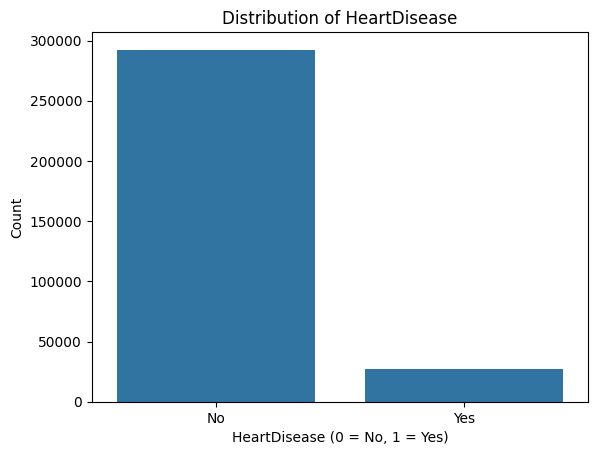

HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'HeartDisease'
sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of HeartDisease')
plt.xlabel('HeartDisease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Print percentage distribution
distribution = data['HeartDisease'].value_counts(normalize=True) * 100
print(distribution)

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

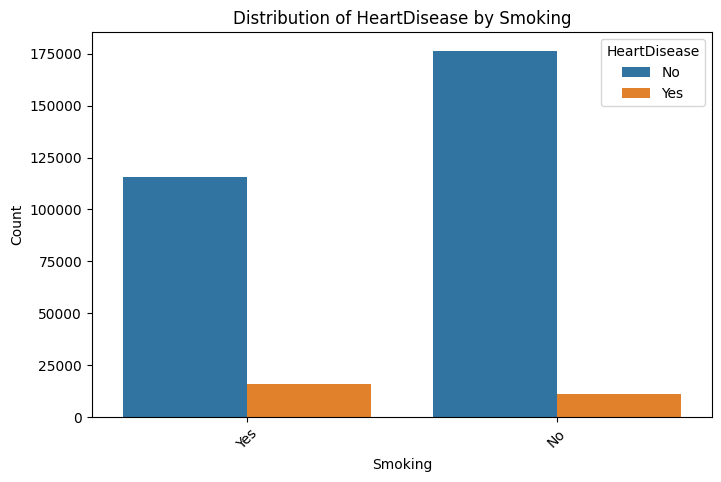

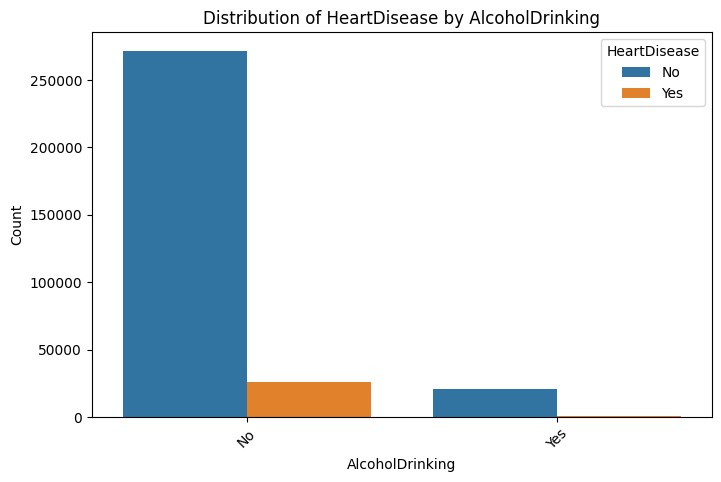

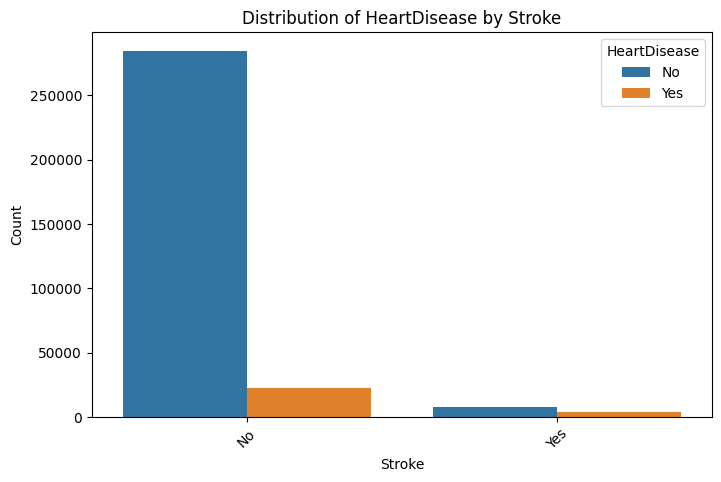

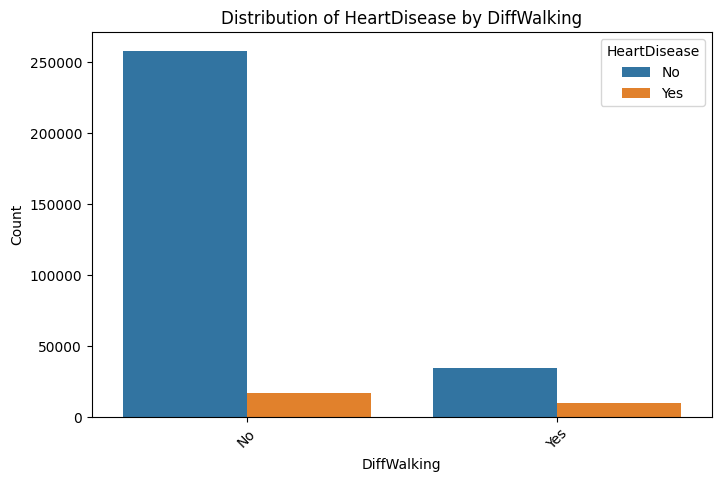

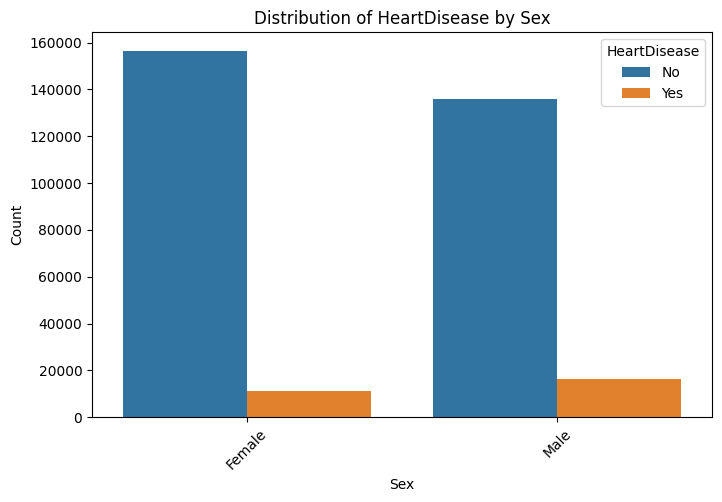

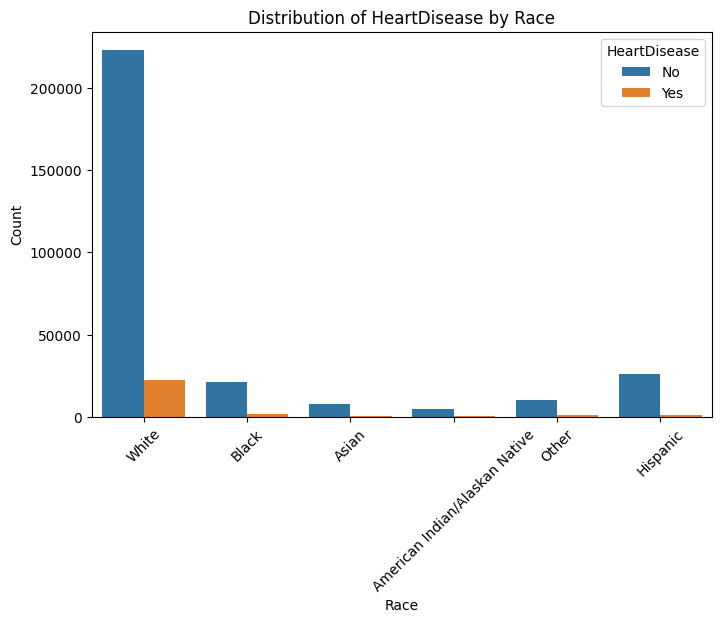

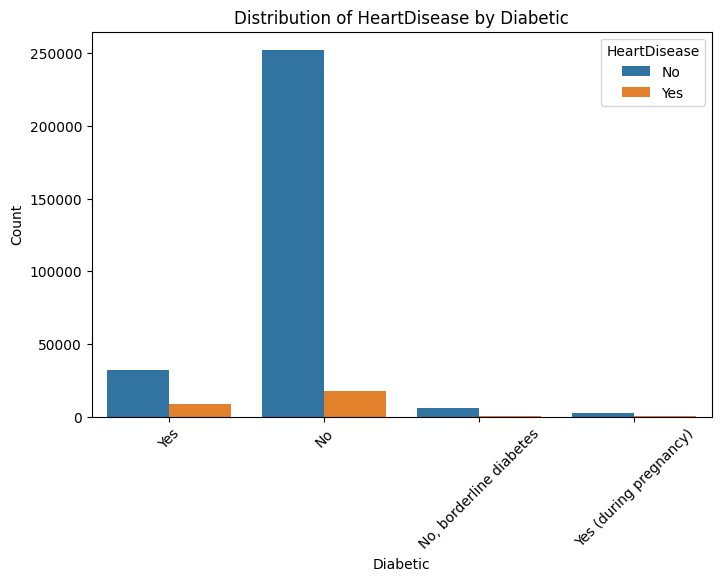

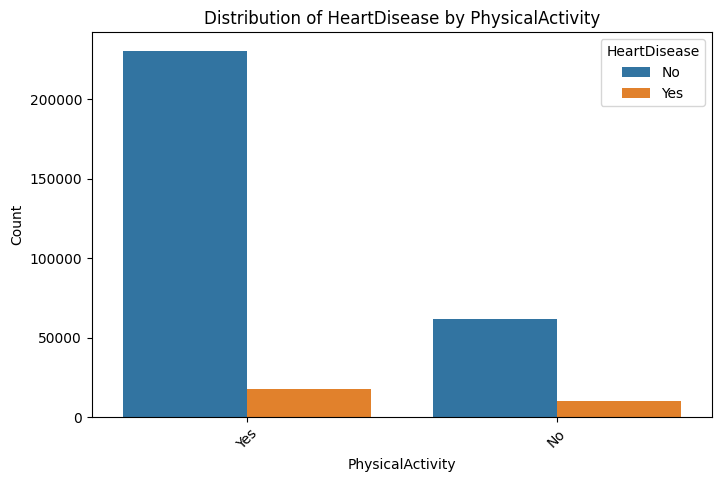

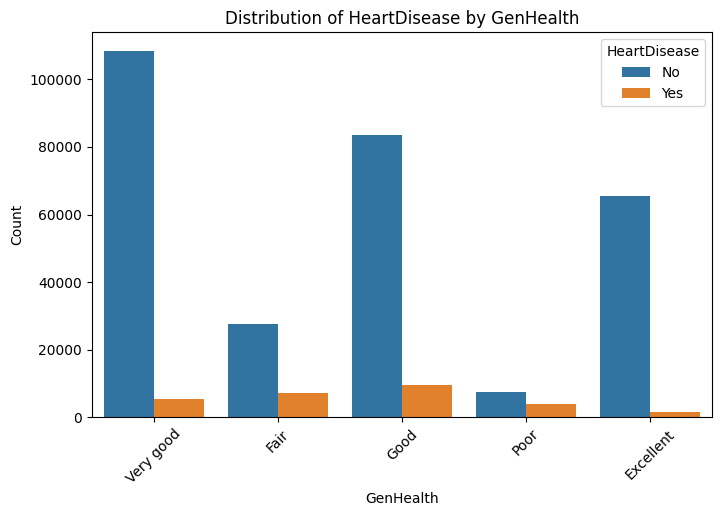

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical features
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                        'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth']

# Visualize the distribution of HeartDisease with respect to each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='HeartDisease', data=data)
    plt.title(f'Distribution of HeartDisease by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='HeartDisease', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [18]:
# Check unique categories in the 'Diabetic' column
unique_categories = data['Diabetic'].unique()
print("Unique categories before replacement:", unique_categories)

# Replace specific categories
data['Diabetic'] = data['Diabetic'].replace({
    'Yes (during pregnancy)': 'Yes',
    'No, borderline diabetes': 'No'
})

# Verify the updated categories
updated_categories = data['Diabetic'].unique()
print("Unique categories after replacement:", updated_categories)


Unique categories before replacement: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique categories after replacement: ['Yes' 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1.

In [20]:
# Replace 'No' with 0 and 'Yes' with 1 and explicitly cast the type to integer
data['HeartDisease'] = data['HeartDisease'].replace({'No': 0, 'Yes': 1}).astype(int)

# Verify the unique values in the column
print(data['HeartDisease'].unique())


[0 1]


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Columns to label encode
columns_to_label_encode = ["AgeCategory", "Race", "GenHealth"]

# Apply label encoding to specified columns
for column in columns_to_label_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Perform dummy encoding for other categorical columns
# Identify remaining categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding (dummy encoding) to these columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the updated dataset
print(data.head())


   HeartDisease    BMI  PhysicalHealth  MentalHealth  AgeCategory  Race  \
0             0  16.60             3.0          30.0            7     5   
1             0  20.34             0.0           0.0           12     5   
2             0  26.58            20.0          30.0            9     5   
3             0  24.21             0.0           0.0           11     5   
4             0  23.71            28.0           0.0            4     5   

   GenHealth  SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
0          4        5.0         True                False       False   
1          4        7.0        False                False        True   
2          1        8.0         True                False       False   
3          2        6.0        False                False       False   
4          4        8.0        False                False       False   

   DiffWalking_Yes  Sex_Male  Diabetic_Yes  PhysicalActivity_Yes  Asthma_Yes  \
0            False     False  

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [22]:
# Target variable
y = data['HeartDisease']

# Feature variables
X = data.drop(columns=['HeartDisease'])

# Display the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (319795, 17)
Shape of y: (319795,)


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [23]:
from sklearn.model_selection import train_test_split

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the train and test datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (223856, 17)
Shape of X_test: (95939, 17)
Shape of y_train: (223856,)
Shape of y_test: (95939,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Identify numerical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns in training and test datasets
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Display the first few rows of the standardized training set
print(X_train.head())


             BMI  PhysicalHealth  MentalHealth  AgeCategory      Race  \
303145 -1.229576        0.080386     -0.490018    -0.424627  0.497695   
61634   0.391450       -0.423721     -0.490018     0.978429 -0.327781   
117690  0.877286       -0.423721     -0.490018    -0.144016  0.497695   
132104 -1.059769       -0.423721     -0.490018     1.539652  0.497695   
262165 -0.405699       -0.423721     -0.490018     1.259040  0.497695   

        GenHealth  SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
303145  -1.447110   0.628794        False                False       False   
61634    1.159133  -0.067283        False                False       False   
117690  -0.143989  -0.763360        False                False       False   
132104   1.159133   0.628794         True                False       False   
262165   1.159133  -0.067283        False                False       False   

        DiffWalking_Yes  Sex_Male  Diabetic_Yes  PhysicalActivity_Yes  \
303145            F

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [25]:
from sklearn.metrics import accuracy_score

# Define a function to train the model, make predictions, and calculate accuracy
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    """
    Train a given model, make predictions on the test data, and return the accuracy score.

    Parameters:
        model: The machine learning model to be trained.
        X_train: Training feature dataset.
        X_test: Testing feature dataset.
        y_train: Training target dataset.
        y_test: Testing target dataset.

    Returns:
        accuracy: The accuracy score of the model on the test data.
    """
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Example Usage:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# accuracy = train_and_evaluate(model, X_train, X_test, y_train, y_test)
# print(f"Accuracy of the model: {accuracy:.2f}")


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [ ]:
from sklearn.metrics import accuracy_score

def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    """
    Train a given model, make predictions on the test data, and return the accuracy score.
    """
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

    from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

# Define the models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boost': GradientBoostingClassifier()
}

# Train and evaluate each model
model_results = {}
for name, model in models.items():
    accuracy = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    model_results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")

# Create a Stacked Classifier
stacking_estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]
stacked_model = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression())
stacked_accuracy = train_and_evaluate(stacked_model, X_train, X_test, y_train, y_test)

# Add the Stacked Classifier result
model_results['Stacked Classifier'] = stacked_accuracy
print(f"Stacked Classifier: Accuracy = {stacked_accuracy:.2f}")

# Display all results
import pandas as pd
model_results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])

import ace_tools as tools; tools.display_dataframe_to_user(name="Model Accuracy Comparison", dataframe=model_results_df)

model_results_df



Logistic Regression: Accuracy = 0.91


### Conclusion

----
## Happy Learning:)
----